In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
from citipy import citipy
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates=list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=da14b0a5c04afb055a5edd8e30f5036c


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | airai
Processing Record 3 of Set 1 | nome
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | san cosme y damian
Processing Record 6 of Set 1 | olafsvik
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | asau
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | kalemie
Processing Record 11 of Set 1 | hovd
Processing Record 12 of Set 1 | kaabong
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | makiyivka
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | salisbury
Processing Record 21 of Set 1 | dillon
Processing Record 22 of Set 1 | khani
Processing Record 23 of Set 1 | ushuaia
Processing Record 24 of Set 1 | sain

Processing Record 34 of Set 4 | longyearbyen
Processing Record 35 of Set 4 | faya
Processing Record 36 of Set 4 | lolua
City not found. Skipping...
Processing Record 37 of Set 4 | rungata
City not found. Skipping...
Processing Record 38 of Set 4 | sitka
Processing Record 39 of Set 4 | diapaga
Processing Record 40 of Set 4 | samusu
City not found. Skipping...
Processing Record 41 of Set 4 | leningradskiy
Processing Record 42 of Set 4 | tandil
Processing Record 43 of Set 4 | bluff
Processing Record 44 of Set 4 | kabalo
Processing Record 45 of Set 4 | denpasar
Processing Record 46 of Set 4 | hami
Processing Record 47 of Set 4 | trelew
Processing Record 48 of Set 4 | nyzy
Processing Record 49 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 50 of Set 4 | parana
Processing Record 1 of Set 5 | pointe michel
Processing Record 2 of Set 5 | lexington
Processing Record 3 of Set 5 | tuatapere
Processing Record 4 of Set 5 | dmitriyevka
Processing Record 5 of Set 5 | san policarpo


Processing Record 22 of Set 8 | kaolinovo
Processing Record 23 of Set 8 | alofi
Processing Record 24 of Set 8 | kavieng
Processing Record 25 of Set 8 | los llanos de aridane
Processing Record 26 of Set 8 | kismayo
Processing Record 27 of Set 8 | galesong
Processing Record 28 of Set 8 | mathbaria
Processing Record 29 of Set 8 | baykit
Processing Record 30 of Set 8 | praia da vitoria
Processing Record 31 of Set 8 | neryungri
Processing Record 32 of Set 8 | elmira
Processing Record 33 of Set 8 | creston
Processing Record 34 of Set 8 | gap
Processing Record 35 of Set 8 | tiruvottiyur
City not found. Skipping...
Processing Record 36 of Set 8 | zachagansk
City not found. Skipping...
Processing Record 37 of Set 8 | tungkang
City not found. Skipping...
Processing Record 38 of Set 8 | clarence town
Processing Record 39 of Set 8 | salalah
Processing Record 40 of Set 8 | vangaindrano
Processing Record 41 of Set 8 | tabuk
Processing Record 42 of Set 8 | dahuk
Processing Record 43 of Set 8 | krumov

Processing Record 10 of Set 12 | manzhouli
Processing Record 11 of Set 12 | show low
Processing Record 12 of Set 12 | manoel urbano
Processing Record 13 of Set 12 | sipovo
Processing Record 14 of Set 12 | kidal
Processing Record 15 of Set 12 | camargo
Processing Record 16 of Set 12 | andenes
Processing Record 17 of Set 12 | stolin
Processing Record 18 of Set 12 | thessalon
Processing Record 19 of Set 12 | san vicente
Processing Record 20 of Set 12 | waw
Processing Record 21 of Set 12 | khonuu
City not found. Skipping...
Processing Record 22 of Set 12 | santa maria di sala
Processing Record 23 of Set 12 | tutoia
Processing Record 24 of Set 12 | seybaplaya
Processing Record 25 of Set 12 | raisen
Processing Record 26 of Set 12 | maputo
Processing Record 27 of Set 12 | puerto quijarro
Processing Record 28 of Set 12 | chapel hill
Processing Record 29 of Set 12 | deputatskiy
Processing Record 30 of Set 12 | fairbanks
Processing Record 31 of Set 12 | fare
Processing Record 32 of Set 12 | mars

In [8]:
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,82.15,80,97,19.30,KI,2023-04-03 21:04:21
1,Airai,-8.9266,125.4092,57.40,87,99,2.04,TL,2023-04-03 21:04:22
2,Nome,64.5011,-165.4064,13.15,78,75,4.61,US,2023-04-03 21:04:22
3,Mataura,-46.1927,168.8643,58.48,76,89,2.98,NZ,2023-04-03 21:04:23
4,San Cosme Y Damian,-27.3167,-56.3500,91.58,29,24,4.65,PY,2023-04-03 21:04:23
5,Olafsvik,64.8945,-23.7142,41.95,93,100,22.44,IS,2023-04-03 21:04:23
6,Busselton,-33.6500,115.3333,59.68,79,24,6.40,AU,2023-04-03 21:04:24
7,Asau,46.4333,26.4000,38.32,90,100,5.68,RO,2023-04-03 21:04:24
8,Pevek,69.7008,170.3133,-18.51,95,45,7.25,RU,2023-04-03 21:04:24
9,Kalemie,-5.9475,29.1947,70.63,91,100,3.06,CD,2023-04-03 21:04:25


In [9]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [10]:
new_column_order=['City','Country','Date','Lat', 'Lng', 'Max Temp','Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2023-04-03 21:04:21,3.0707,172.7902,82.15,80,97,19.30
1,Airai,TL,2023-04-03 21:04:22,-8.9266,125.4092,57.40,87,99,2.04
2,Nome,US,2023-04-03 21:04:22,64.5011,-165.4064,13.15,78,75,4.61
3,Mataura,NZ,2023-04-03 21:04:23,-46.1927,168.8643,58.48,76,89,2.98
4,San Cosme Y Damian,PY,2023-04-03 21:04:23,-27.3167,-56.3500,91.58,29,24,4.65
...,...,...,...,...,...,...,...,...,...
557,Paraiso,CR,2023-04-03 21:19:10,9.8383,-83.8656,79.66,76,100,4.56
558,Westport,US,2023-04-03 21:17:33,41.1415,-73.3579,58.14,54,0,14.97
559,Kampene,CD,2023-04-03 21:19:11,-3.6000,26.6667,67.73,99,98,2.10
560,Gravdal,NO,2023-04-03 21:19:11,68.1214,13.5031,39.09,75,40,17.27


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Get today's date in seconds.
today = time.time()
today

1680556752.1332543

In [14]:
time=time.strftime("%x")
time               

'04/03/23'

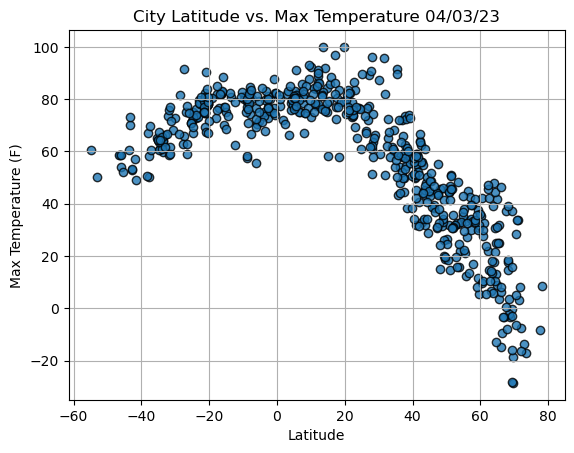

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

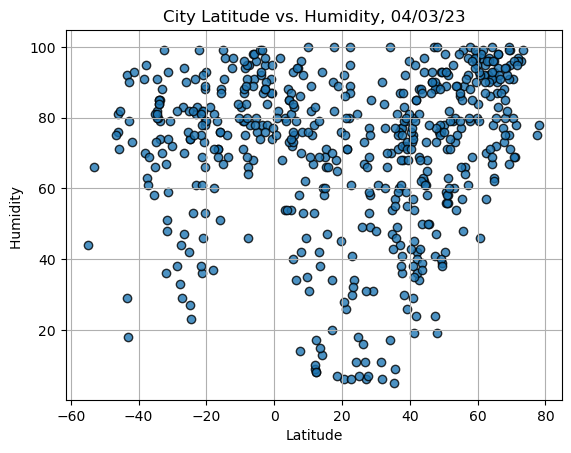

In [16]:
# Plot Latitude vs.humidity
plt.scatter(lats,
           humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity, "+ time)
plt.ylabel("Humidity ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

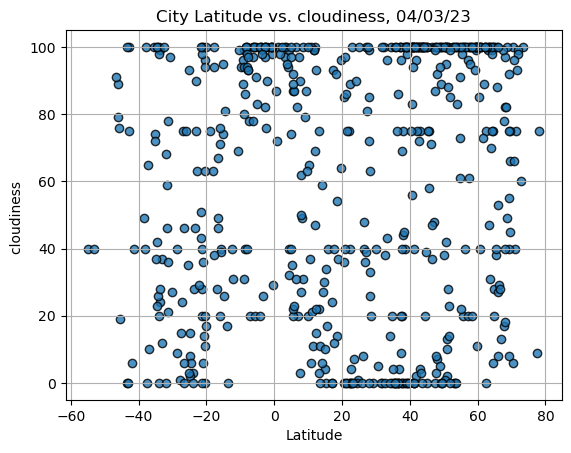

In [17]:
# Plot Latitude vs.  cloudiness
plt.scatter(lats,
         cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness, "+ time)
plt.ylabel("cloudiness ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

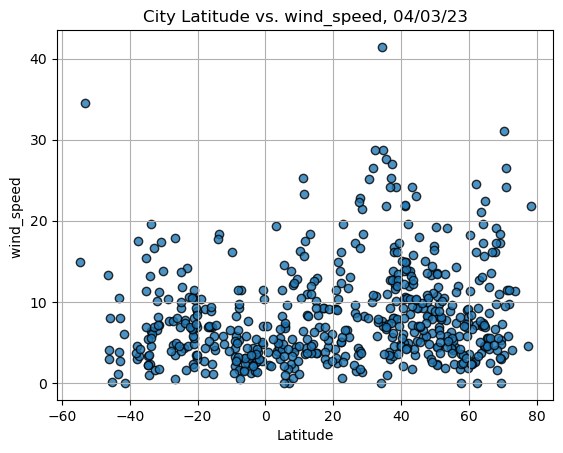

In [18]:
# Plot Latitude vs. Wind Speed
plt.scatter(lats,
         wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. wind_speed, "+ time)
plt.ylabel("wind_speed ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()